# Importing library

In [2]:
import numpy as np
import pandas as pd
import regex as re
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import make_scorer, accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import language_tool_python
from concurrent.futures import ProcessPoolExecutor
from sklearn.naive_bayes import MultinomialNB
seed = 202
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

In [3]:
df = pd.read_csv("data/train_v2_drcat_02.csv")
# external_train = pd.read_csv("/kaggle/input/llm-detect-ai-generated-text/train_essays.csv")
# external_train.rename(columns={'generated': 'label'}, inplace=True)

In [4]:
df.shape

(44868, 5)

In [5]:
df.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


In [6]:
np.unique(df["prompt_name"])

array(['"A Cowboy Who Rode the Waves"', 'Car-free cities',
       'Cell phones at school', 'Community service', 'Distance learning',
       'Does the electoral college work?', 'Driverless cars',
       'Exploring Venus', 'Facial action coding system',
       'Grades for extracurricular activities',
       'Mandatory extracurricular activities', 'Phones and driving',
       'Seeking multiple opinions', 'Summer projects', 'The Face on Mars'],
      dtype=object)

In [7]:
def seed_everything(seed=202):
    import random
    random.seed(seed)
    np.random.seed(seed)

seed_everything(seed)

# Data Imports and Feature Engineering

In [8]:
tool = language_tool_python.LanguageTool('en-US')
def correct_sentence(sentence):
    return tool.correct(sentence)
def correct_df(df):
    with ProcessPoolExecutor() as executor:
        df['text'] = list(executor.map(correct_sentence, df['text']))

In [9]:
def how_many_typos(text):    
    return len(tool.check(text))

In [10]:
not_persuade_df = df[df['source'] != 'persuade_corpus']
persuade_df = df[df['source'] == 'persuade_corpus']
sampled_persuade_df = persuade_df.sample(n=6000, random_state=42)

all_human = set(list(''.join(sampled_persuade_df.text.to_list())))
other = set(list(''.join(not_persuade_df.text.to_list())))
chars_to_remove = ''.join([x for x in other if x not in all_human])
print(chars_to_remove)

translation_table = str.maketrans('', '', chars_to_remove)
def remove_chars(s):
    return s.translate(translation_table)

📈🥁🤫🐶所💪️🚀🐸🥖🌏🌐🏽🥤😋道📖う🇯🏙🏠😖🐱集🏔♀😷🚪🍋ā🙌еこ🎃上🐻💔🍷🤷🙊😅’👻🍔🏼🛍😭🚨🎮📣🇺🌟💇😘✨🤢📝护🥩に🌱🐒🎤🚌­🏢⏰💭📰🤒📦🎯
😤🌸🎸💕止该🎭🧘部合🧖🍮🔮–🏋🔬👍せ🍕🧙将🥟​🍟🎬�🌧有°🛑🏖😂😱🇵🧹🧀🇫🚚🌊😬💨🤝🚕🥘—÷🕰都╯🌃🥔🧠🛬り必🏟🍭🌯📄а👂🕺💁🌨🛠🙏选取👋📹…🚭д🚑🦄👇❄🐕🙋🧦🏦🙀🤪司👮一🥨在🐳🙅🏡み🏳😈🥗ç😄🤗□🚔🥯🇧🏕📷🌫🏜🏊🍞须驾с🛫💀力意😨唯💼🛣🎢🏄🍁💤🧐す🌭🐾🎉🧚🎵驶🌄🤕📊💸🇪とü😳💅п👕🤦🌞🎊🤣👨🎶🍳🐭🦁🏥🌷🎹🌴😲🤟💚🐴使👏😍机🗳🌻😜🦸手😔🌅🎓📧😩🥲💘🧑😃注🎅¬о💻📚é🥑👥🕵🏃ê🤖😉法з😝的。🤓😁😵🤔🥕😎🧩💉😴‘🍲💰😡👪🌈💃择🤩是者🍝🦐🤘😢🎧💖👧🍿🔭🥳😌🐦ã🔑“用🐠🍰🥛安🔜🍓^が🐢♂🎾🏛🔋💥🍗💬💆路🙃💊🧭”😊🏰😻🌌🏆🐧🤤📞─🎣🐝🎄应📺🏨🥪は🚫👬全😠É🍖í🛋🚣🏻🔥🍴和👫🐟中影😒🧬🏞🦎🌲🥶🥭🤜📸🐬👀🤞🏈☀ま👦👩💜🔍🌮💯🐆🍣🎩保💫⚽🚴🇸🇷响💧🗣🌽🍜🌠🥜👌ち🏯🎈🍽🤯🍎🙄🌳🌎🍄😕😓😮📱😆🧽🎠🙈🔧あ🏏🚂🚗🌿时🛀🕹🐰👯ん完😹☹🏫📅禁🎨🥦🏀💦🛸🎥‍🤛р🕒📉💡🧡


In [11]:
df['text'] = df['text'].apply(remove_chars)
df['text'] = df['text'].str.replace('\n', '')

# test = pd.read_csv('/kaggle/input/llm-detect-ai-generated-text/test_essays.csv')
# test['text'] = test['text'].str.replace('\n', '')
# test['text'] = test['text'].apply(remove_chars)
# correct_df(test)
# df = pd.concat([train['text'], test['text']], axis=0)


In [12]:
# Too time consuming to run
# %%time
# correct_df(df)

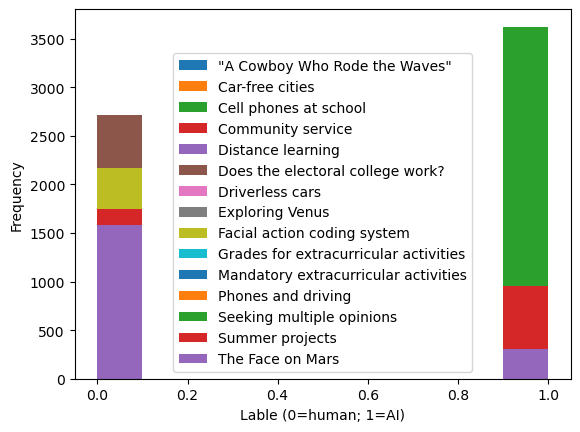

In [13]:
import matplotlib.pyplot as plt

df.groupby("prompt_name")["label"].plot(kind='hist')
plt.legend(np.unique(df["prompt_name"]))
plt.xlabel("Lable (0=human; 1=AI)")
plt.show()

In [14]:
#from sklearn.model_selection import train_test_split
#train, test  = train_test_split(df, test_size=0.20,  stratify=df.label, random_state=5)

In [15]:
train = df.loc[df["prompt_name"] != "The Face on Mars"]
test = df.loc[df["prompt_name"] == "The Face on Mars"]

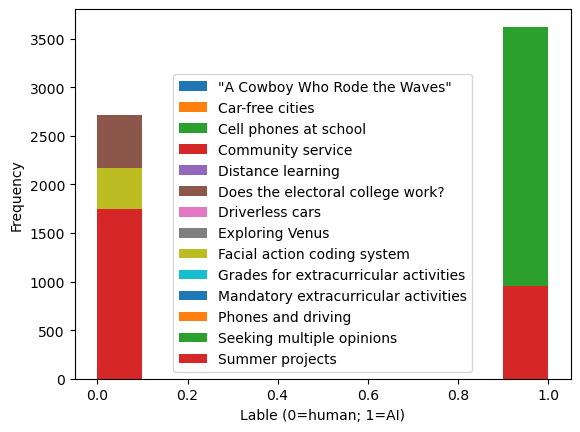

In [16]:
train.groupby("prompt_name")["label"].plot(kind='hist')
plt.legend(np.unique(train["prompt_name"]))
plt.xlabel("Lable (0=human; 1=AI)")
plt.show()

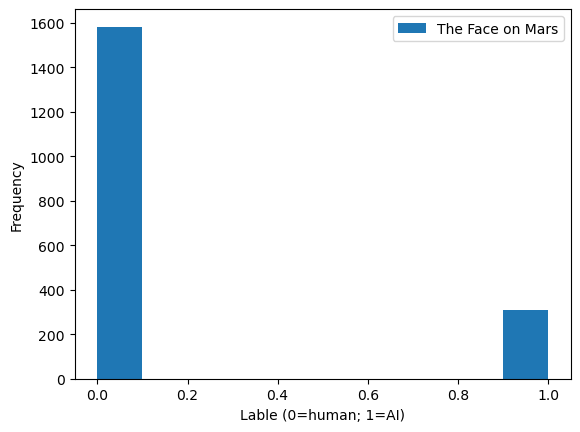

In [17]:
test.groupby("prompt_name")["label"].plot(kind='hist')
plt.legend(np.unique(test["prompt_name"]))
plt.xlabel("Lable (0=human; 1=AI)")
plt.show()

In [34]:
tfid_vectorizer = TfidfVectorizer(ngram_range=(3, 5),tokenizer=lambda x: re.findall(r'[^\W]+', x),token_pattern=None,strip_accents='unicode',)
X_train = tfid_vectorizer.fit_transform(train['text'])
X_test = tfid_vectorizer.transform(test['text'])

# Custom Tokenizer

In [21]:
import sys
import gc

import pandas as pd
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import roc_auc_score
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer

from tokenizers import (
    decoders,
    models,
    normalizers,
    pre_tokenizers,
    processors,
    trainers,
    Tokenizer,
)

from datasets import Dataset
from tqdm.auto import tqdm
from transformers import PreTrainedTokenizerFast

from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier

/home/tdhttt/anaconda3/envs/detectAI/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
LOWERCASE = True
VOCAB_SIZE = 30522

In [24]:
# Creating Byte-Pair Encoding tokenizer
raw_tokenizer = Tokenizer(models.BPE(unk_token="[UNK]"))


# Adding normalization and pre_tokenizer
raw_tokenizer.normalizer = normalizers.Sequence([normalizers.NFC()] + [normalizers.Lowercase()] if LOWERCASE else [])
raw_tokenizer.pre_tokenizer = pre_tokenizers.ByteLevel()

# Adding special tokens and creating trainer instance
special_tokens = ["[UNK]", "[PAD]", "[CLS]", "[SEP]", "[MASK]"]
trainer = trainers.BpeTrainer(vocab_size=VOCAB_SIZE, special_tokens=special_tokens)



# Creating huggingface dataset object
dataset = Dataset.from_pandas(test[['text']])

def train_corp_iter():
    """
    A generator function for iterating over a dataset in chunks.
    """    
    for i in range(0, len(dataset), 1000):
        yield dataset[i : i + 1000]["text"]

# Training from iterator REMEMBER it's training on test set...
raw_tokenizer.train_from_iterator(train_corp_iter(), trainer=trainer)

tokenizer = PreTrainedTokenizerFast(
    tokenizer_object=raw_tokenizer,
    unk_token="[UNK]",
    pad_token="[PAD]",
    cls_token="[CLS]",
    sep_token="[SEP]",
    mask_token="[MASK]",
)


tokenized_texts_test = []

# Tokenize test set with new tokenizer
for text in tqdm(test['text'].tolist()):
    tokenized_texts_test.append(tokenizer.tokenize(text))


# Tokenize train set
tokenized_texts_train = []

for text in tqdm(train['text'].tolist()):
    tokenized_texts_train.append(tokenizer.tokenize(text))

100%|████████████████| 42975/42975 [00:48<00:00, 877.61it/s]


In [26]:
tokenized_texts_test[1]

['Ġthe',
 'Ġface',
 'Ġyou',
 'Ġsee',
 'Ġin',
 'Ġthe',
 'Ġphotos',
 'Ġis',
 'Ġmerely',
 'Ġan',
 'Ġillusion',
 'Ġto',
 'Ġyou',
 '.',
 'Ġthe',
 'Ġface',
 'Ġis',
 'Ġa',
 'Ġhuge',
 'Ġrock',
 'Ġformation',
 'Ġwhich',
 'Ġresembles',
 'Ġa',
 'Ġhead',
 'Ġformed',
 'Ġby',
 'Ġshadows',
 'Ġgiving',
 'Ġthe',
 'Ġillusion',
 'Ġof',
 'Ġeyes',
 ',',
 'Ġmouth',
 ',',
 'Ġnose',
 ',',
 'Ġetc',
 '.',
 'Ġthere',
 'Ġhas',
 'Ġbeen',
 'Ġthree',
 'Ġphotos',
 'Ġtaken',
 'Ġof',
 'Ġthis',
 'Ġrock',
 'Ġformation',
 'Ġsince',
 'Ġ1976',
 ',',
 'Ġsince',
 'Ġthe',
 'Ġ1976',
 'Ġphoto',
 'Ġthe',
 'Ġcamera',
 'Ġresolution',
 ',',
 'Ġmeaning',
 'Ġthe',
 'Ġfocus',
 'Ġof',
 'Ġthe',
 'Ġcamera',
 ',',
 'Ġhas',
 'Ġimproved',
 '.',
 'Ġsince',
 'Ġthe',
 'Ġresolution',
 'Ġof',
 'Ġthese',
 'Ġcameras',
 'Ġhave',
 'Ġimproved',
 'Ġyou',
 'Ġcan',
 'Ġsee',
 'Ġclearly',
 'Ġthat',
 'Ġthere',
 'Ġis',
 'Ġnot',
 'Ġactually',
 'Ġa',
 'Ġface',
 'Ġon',
 'Ġthe',
 'Ġsurface',
 'Ġof',
 'Ġmars',
 '.',
 'Ġit',
 'Ġis',
 'Ġjust',
 'Ġmerely',
 'Ġa',
 '

In [25]:
def dummy(text):
    """
    A dummy function to use as tokenizer for TfidfVectorizer. It returns the text as it is since we already tokenized it.
    """
    return text

In [27]:
# Fitting TfidfVectoizer on test set

vectorizer = TfidfVectorizer(ngram_range=(3, 5), lowercase=False, sublinear_tf=True, analyzer = 'word',
    tokenizer = dummy,
    preprocessor = dummy,
    token_pattern = None, strip_accents='unicode'
                            )

vectorizer.fit(tokenized_texts_test)

# Getting vocab
vocab = vectorizer.vocabulary_

print(vocab)


# Here we fit our vectorizer on train set but this time we use vocabulary from test fit.
vectorizer = TfidfVectorizer(ngram_range=(3, 5), lowercase=False, sublinear_tf=True, vocabulary=vocab,
                            analyzer = 'word',
                            tokenizer = dummy,
                            preprocessor = dummy,
                            token_pattern = None, strip_accents='unicode'
                            )

tf_train = vectorizer.fit_transform(tokenized_texts_train)
tf_test = vectorizer.transform(tokenized_texts_test)

del vectorizer
gc.collect()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



665

In [28]:
tf_train.shape

(42975, 1291187)

In [29]:
tf_test.shape

(1893, 1291187)

# Models

## Logistic Regression

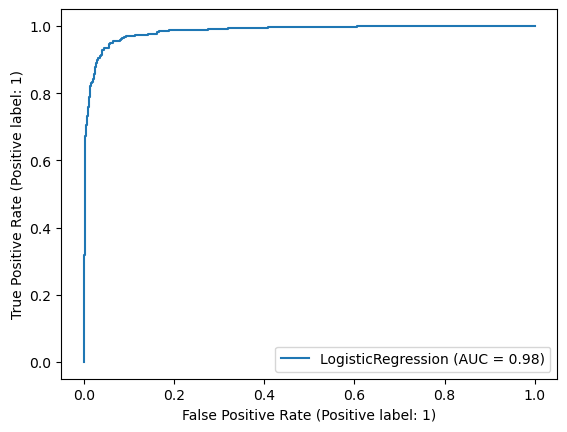

In [35]:
lr_model =LogisticRegression(solver="liblinear")
lr_model.fit(X_train, train['label'])
fig, ax = plt.subplots()
metrics.RocCurveDisplay.from_estimator(lr_model, X_test, test["label"], ax=ax)

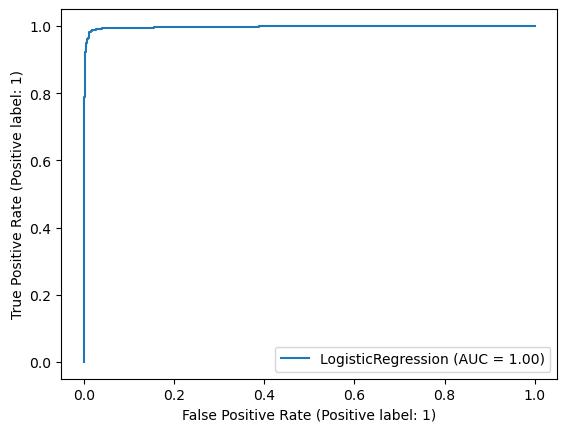

In [32]:
lr_model =LogisticRegression(solver="liblinear")
lr_model.fit(tf_train, train['label'])
fig, ax = plt.subplots()
metrics.RocCurveDisplay.from_estimator(lr_model, tf_test, test["label"], ax=ax)

## SGD Classifier

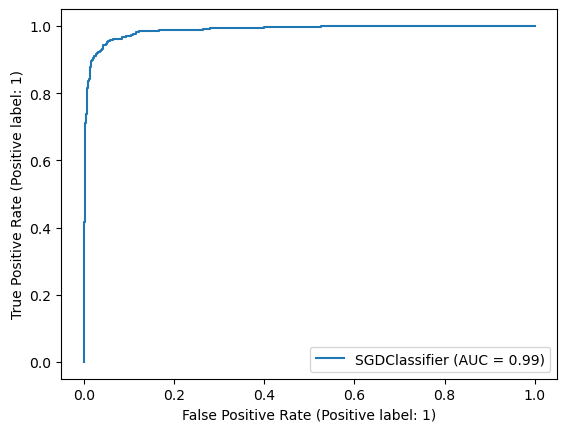

In [36]:
sgd_model = SGDClassifier(max_iter=5000, tol=1e-3, loss="modified_huber")   
sgd_model.fit(X_train, train['label'])
fig, ax = plt.subplots()
metrics.RocCurveDisplay.from_estimator(sgd_model, X_test, test["label"], ax=ax)

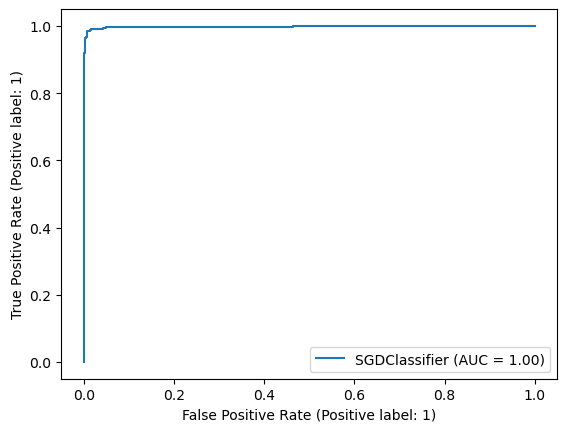

In [37]:
sgd_model = SGDClassifier(max_iter=5000, tol=1e-3, loss="modified_huber")   
sgd_model.fit(tf_train, train['label'])
fig, ax = plt.subplots()
metrics.RocCurveDisplay.from_estimator(sgd_model, tf_test, test["label"], ax=ax)

## Multinominal NB

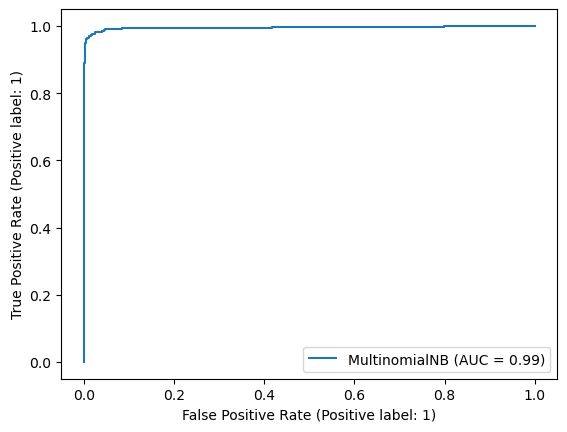

In [21]:
mnb_model = MultinomialNB(alpha=0.02)
mnb_model.fit(X_train, train['label'])
fig, ax = plt.subplots()
metrics.RocCurveDisplay.from_estimator(mnb_model, X_test, test["label"], ax=ax)

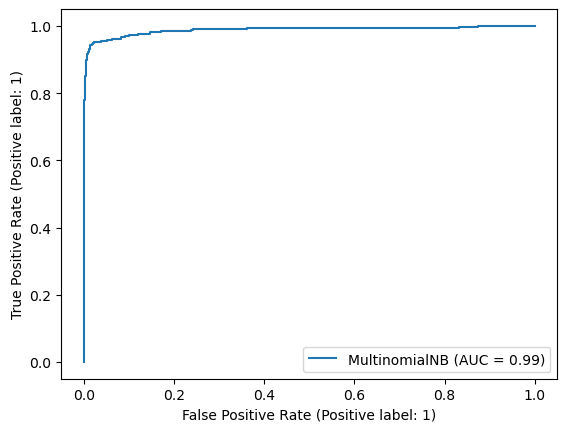

In [38]:
mnb_model = MultinomialNB(alpha=0.02)
mnb_model.fit(tf_train, train['label'])
fig, ax = plt.subplots()
metrics.RocCurveDisplay.from_estimator(mnb_model, tf_test, test["label"], ax=ax)

## XGBoost

In [39]:
from xgboost import XGBClassifier

In [40]:
%%time
xgb_model = XGBClassifier(objective        = 'binary:logistic', 
                           n_estimators     = 100,
                           n_jobs           =  -1,
                          )
xgb_model.fit(X_train, train['label'])

CPU times: user 2h 10min 29s, sys: 4min 40s, total: 2h 15min 9s
Wall time: 11min 58s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

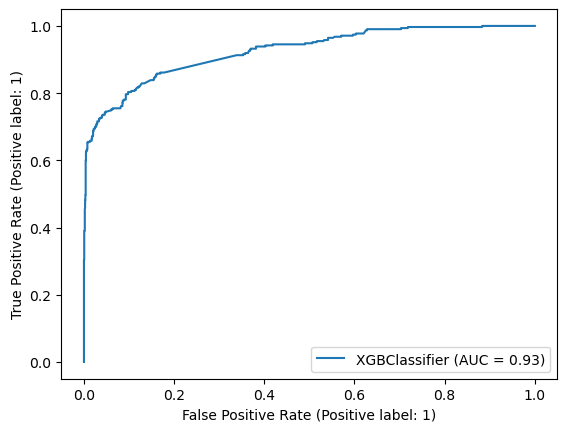

In [41]:
fig, ax = plt.subplots()
metrics.RocCurveDisplay.from_estimator(xgb_model, X_test, test["label"], ax=ax)

CPU times: user 15min 13s, sys: 35.4 s, total: 15min 48s
Wall time: 1min 20s


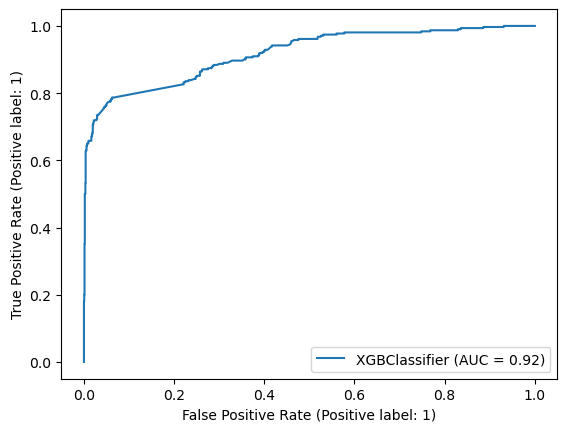

In [42]:
%%time
xgb_model = XGBClassifier(objective        = 'binary:logistic', 
                           n_estimators     = 100,
                           n_jobs           =  -1,
                          )
xgb_model.fit(tf_train, train['label'])
fig, ax = plt.subplots()
metrics.RocCurveDisplay.from_estimator(xgb_model, tf_test, test["label"], ax=ax)

## Voting Classifier

In [27]:
lr=LogisticRegression(solver="liblinear")
clf = MultinomialNB(alpha=0.02)
sgd1 = SGDClassifier(max_iter=5000, tol=1e-3, loss="modified_huber")   
# sgd2 = SGDClassifier(max_iter=8000, tol=1e-4, loss="modified_huber", class_weight="balanced") 
# sgd3 = SGDClassifier(max_iter=10000, tol=5e-4, loss="modified_huber", early_stopping=True)
xgb = XGBClassifier(objective        = 'binary:logistic', 
                           n_estimators     = 100,
                           n_jobs           =  -1,
                          )
estimators = [('lr',lr),('mnb',clf),('sgd', sgd1)]
#estimators += ('xgb', xgb)
ensemble = VotingClassifier(estimators=estimators,voting='soft')
ensemble.fit(X_train, train.label)

VotingClassifier(estimators=[('lr', LogisticRegression(solver='liblinear')),
                             ('mnb', MultinomialNB(alpha=0.02)),
                             ('sgd',
                              SGDClassifier(loss='modified_huber',
                                            max_iter=5000))],
                 voting='soft')

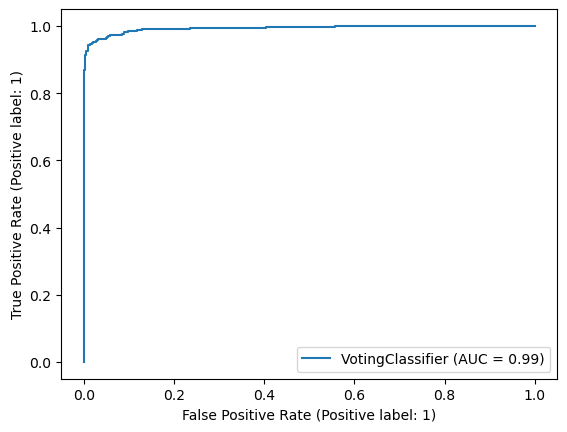

In [28]:
fig, ax = plt.subplots()
metrics.RocCurveDisplay.from_estimator(ensemble, X_test, test["label"], ax=ax)

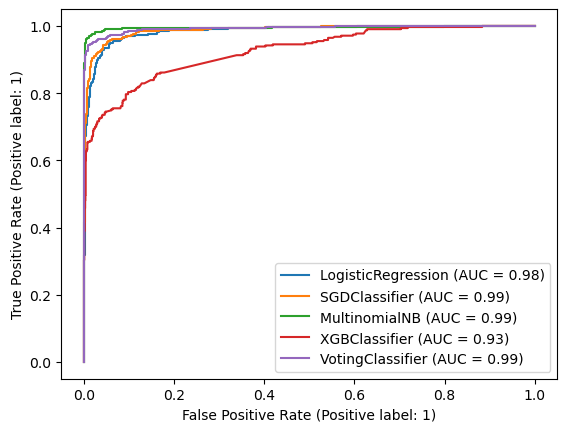

In [29]:
fig, ax = plt.subplots()
for model in [lr_model, sgd_model, mnb_model, xgb_model, ensemble]:
    metrics.RocCurveDisplay.from_estimator(model, X_test, test["label"], ax=ax)